# An example of social network analysis on random data

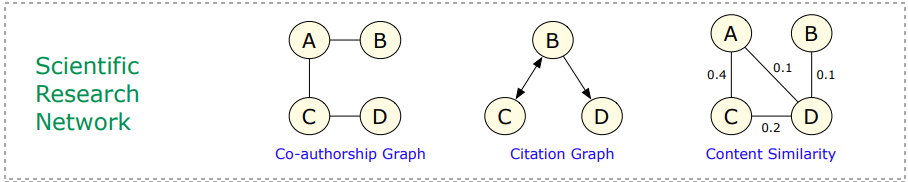
[Slides used for example](https://www.ic.unicamp.br/~wainer/cursos/1s2012/mc906/grafos.pdf)   
[NetworkX documentation](https://networkx.github.io/documentation/networkx-1.10/index.html)

## Setting up environment and generating data
We first load the libraries we'll use for this example and proceed to generate our data. Using NetworkX, we gerenate an **Erdős-Rényi** graph (also called binomial graph). We can select the number of nodes and the probability of creating an edge in each node. We will set a random seed for reproducibility. 

Erdős–Rény directed random graph, 50 nodes and 10% prob of connectivity


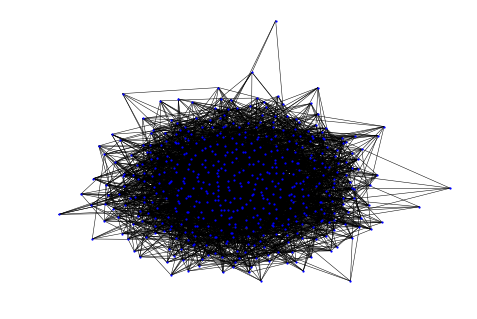

In [286]:
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from operator import itemgetter
import community
from networkx.algorithms.community import k_clique_communities

#generated graphs
G = nx.erdos_renyi_graph(500, 0.03, seed=42, directed=False)

options = {
    'node_color': 'blue',
    'node_size': 5,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.5,
    'font_size':20
}
print("Erdős–Rény directed random graph, 500 nodes and 3% probability of connectivity")
nx.draw(G,with_labels=False,**options)
plt.show()

With high numbers of nodes it's difficult to make out information visually. We can compute several metrics instead.  
## Clustering
The **clustering coefficient of a node** is the fraction of possible triangles through that node that exist.
The **average clustering coefficient** computes the average

In [299]:
print("Average Clustering Coefficient:",nx.average_clustering(G))
print("Clustering coefficient per node, top 10")
c = nx.clustering(G)
c = sorted(c.items(), key=itemgetter(1), reverse=True)[:10]
print(c)

Average Clustering Coefficient: 0.028125523489388078
Clustering coefficient per node, top 10
[(103, 0.14285714285714285), (382, 0.1111111111111111), (54, 0.1), (465, 0.09090909090909091), (422, 0.08974358974358974), (243, 0.08888888888888889), (69, 0.08333333333333333), (374, 0.07692307692307693), (469, 0.07692307692307693), (24, 0.07142857142857142)]


## Centrality
Useful to determine importance, popularity, or social capital of a node in a social network. Each method has different applications and will yield different answers.    
**Degree centrality** counts the number of edges each node has. Finds very connected nodes, showing for example popularity. 

In [300]:
print("Top 5")
dc = nx.degree_centrality(G)
dc = sorted(dc.items(), key=itemgetter(1), reverse=True)[:5]
print(dc)

Top 5
[(234, 0.052104208416833664), (160, 0.0501002004008016), (324, 0.0501002004008016), (384, 0.0501002004008016), (385, 0.0501002004008016)]


**Betweenness centrality** computes node centrality based on shortest paths between other nodes in the graph. It is useful to identify nodes that influence flow on a network. 

In [301]:
print("Top 5")
bc = nx.betweenness_centrality(G)
bc = sorted(bc.items(), key=itemgetter(1), reverse=True)[:5]
print(bc)

Top 5
[(385, 0.009895012296840054), (384, 0.009528011289252713), (234, 0.009218022546181568), (160, 0.008475105112482695), (286, 0.008191861039381708)]


**Eigenvector centrality** computes node centrality based on centrality of neighbors. It detects influence over the whole network. 

In [302]:
print("Top 5")
ec = nx.eigenvector_centrality(G)
ec = sorted(ec.items(), key=itemgetter(1), reverse=True)[:5]
print(ec)

Top 5
[(324, 0.08159985176980003), (234, 0.07964788888823585), (40, 0.07645447805442897), (413, 0.07574119332772787), (286, 0.07467718944072294)]


### Communities in a network
#### Implementation of the [Louvain method](https://sites.google.com/site/findcommunities/)
The method consists of two phases. First, it looks for "small" communities by optimizing modularity in a local way. Second, it aggregates nodes of the same community and builds a new network whose nodes are the communities. These steps are repeated iteratively until a maximum of modularity is attained.

In [303]:
print("Finding communities")
import community
partition = community.best_partition(G)

for i in set(partition.values()):
    print("Community", i)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == i]
    print(members)

Finding communities
Community 0
[0, 12, 13, 42, 53, 58, 62, 68, 69, 77, 90, 94, 103, 104, 114, 121, 125, 140, 141, 143, 146, 149, 159, 164, 165, 192, 203, 209, 225, 226, 230, 237, 240, 250, 251, 257, 266, 270, 280, 289, 319, 321, 326, 339, 342, 343, 345, 349, 357, 361, 363, 394, 402, 441, 443, 449, 467, 475, 482, 488, 496]
Community 1
[1, 22, 35, 46, 82, 88, 101, 133, 184, 190, 195, 205, 210, 215, 229, 238, 247, 261, 276, 281, 292, 315, 353, 359, 385, 408, 414, 462, 477, 478, 485, 486, 493]
Community 2
[2, 9, 21, 32, 39, 63, 71, 100, 112, 118, 124, 127, 128, 131, 145, 161, 166, 174, 180, 199, 204, 206, 242, 259, 268, 285, 305, 313, 322, 351, 356, 379, 388, 393, 397, 401, 405, 425, 431, 438, 444, 480, 481, 483, 487, 491]
Community 3
[3, 7, 8, 11, 20, 23, 38, 48, 52, 57, 61, 66, 78, 84, 85, 96, 97, 111, 115, 116, 126, 134, 144, 148, 157, 170, 173, 178, 181, 218, 227, 231, 244, 248, 253, 254, 260, 274, 275, 277, 278, 279, 282, 283, 296, 298, 299, 312, 320, 325, 330, 337, 355, 370, 378, 38

The algorithm found several distinct communities. The algorithm forces communities to be non-overlapping. This might not be the case empirically, since there might be a degree of association between nodes in a community. 